## 0. Описание задачи
У нас есть данные о том, что делают игроки в начале матче, возможно, с их помощью можно понять, как какие действия влияют на результат матча и предсказывать этот результат.

Импортируем необходимые библиотеки и считываем датасет

In [45]:
import sklearn
import sklearn.model_selection
import sklearn.neighbors
import sklearn.ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline 

## 1. Считывание данных

In [2]:
data = pd.read_csv('./high_diamond_ranked_10min.csv',index_col=[0])
data.reset_index(drop=True, inplace=True)
print(data.shape)

(9879, 39)


In [3]:
data.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

## 2. Визуализация


In [5]:
data.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [6]:
cor_matrix = data.corr()
cor_matrix

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
blueWins,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,0.092385,...,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
blueWardsPlaced,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,0.010104,...,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.015800,-0.027943,-0.012395,-0.005685
blueWardsDestroyed,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,0.016940,...,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
blueFirstBlood,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,0.077509,...,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
blueKills,0.337358,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,0.076195,...,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
blueDeaths,-0.339297,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,-0.095527,...,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
blueAssists,0.276685,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,0.028434,...,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
blueEliteMonsters,0.221944,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,0.640271,...,-0.052029,-0.216616,-0.169649,-0.189816,-0.074838,-0.087893,-0.281464,-0.263991,-0.074838,-0.216616
blueDragons,0.213768,0.017676,0.040504,0.134309,0.170436,-0.188852,0.170873,0.781039,1.000000,0.020381,...,-0.032865,-0.192871,-0.149806,-0.159485,-0.059803,-0.098446,-0.233875,-0.211496,-0.059803,-0.192871
blueHeralds,0.092385,0.010104,0.016940,0.077509,0.076195,-0.095527,0.028434,0.640271,0.020381,1.000000,...,-0.042872,-0.109557,-0.087337,-0.107718,-0.046253,-0.019622,-0.162943,-0.162496,-0.046253,-0.109557


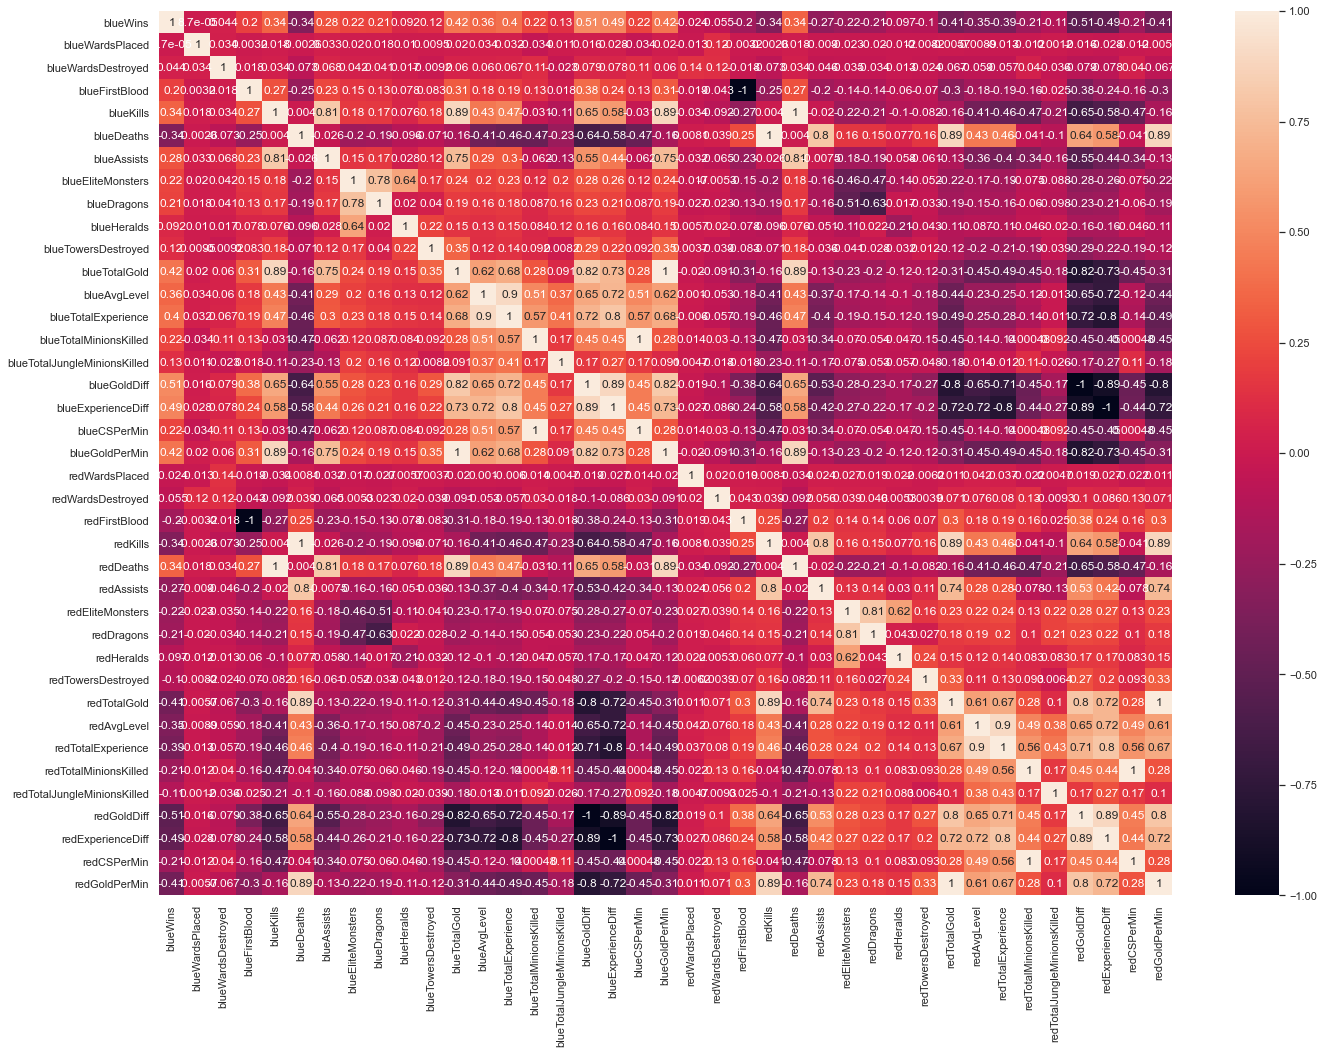

In [7]:
sns.set(rc={'figure.figsize':(22.7,16.27)})
ax = sns.heatmap(cor_matrix, annot=True)

In [14]:
cor_matrix > 0.5

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
blueWins,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
blueWardsPlaced,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
blueWardsDestroyed,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
blueFirstBlood,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
blueKills,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
blueDeaths,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,True,True,False,True
blueAssists,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
blueEliteMonsters,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
blueDragons,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
blueHeralds,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


Удалим признаки, которые сильно коррелируют с другими


In [8]:
new_data = data.drop(columns=['redFirstBlood', 'redExperienceDiff', 'redKills', 'redGoldPerMin', 'blueGoldPerMin', 'redGoldDiff', 
                             'redDeaths', 'redCSPerMin', 'blueCSPerMin'])
new_data

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,...,8,0,0,0,0,16567,6.8,17047,197,55
1,0,12,1,0,5,5,5,0,0,0,...,2,2,1,1,1,17620,6.8,17438,240,52
2,0,15,0,0,7,11,4,1,1,0,...,14,0,0,0,0,17285,6.8,17254,203,28
3,0,43,1,0,4,5,5,1,0,1,...,10,0,0,0,0,16478,7.0,17961,235,47
4,0,75,4,0,6,6,6,0,0,0,...,7,1,1,0,0,17404,7.0,18313,225,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,...,7,0,0,0,0,15246,6.8,16498,229,34
9875,1,54,0,0,6,4,8,1,1,0,...,3,0,0,0,0,15456,7.0,18367,206,56
9876,0,23,1,0,6,7,5,0,0,0,...,11,1,1,0,0,18319,7.4,19909,261,60
9877,0,14,4,1,2,3,3,1,1,0,...,1,0,0,0,0,15298,7.2,18314,247,40


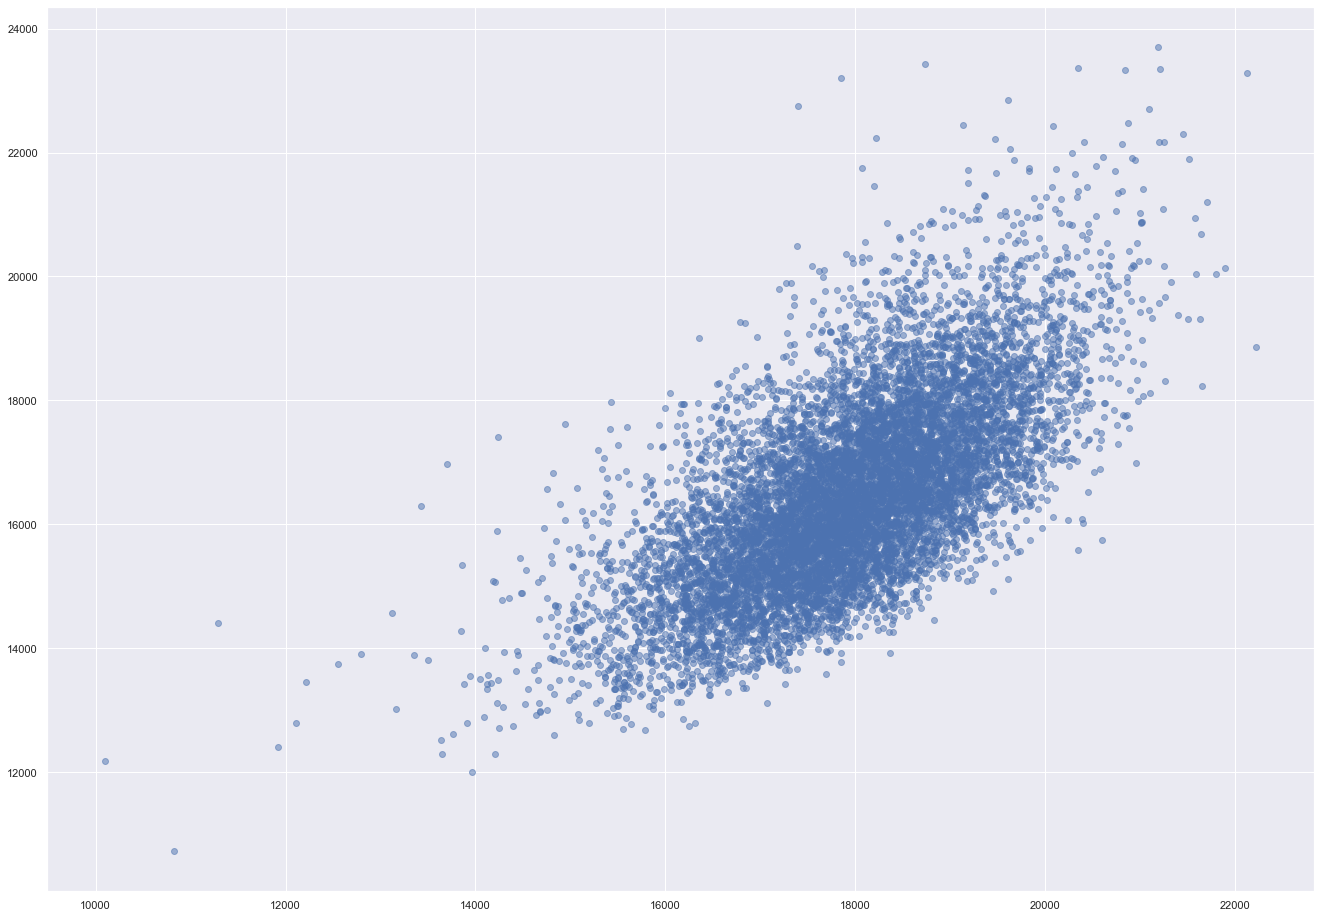

In [10]:
plt.scatter(data['blueTotalExperience'], data['blueTotalGold'], alpha = 0.5)

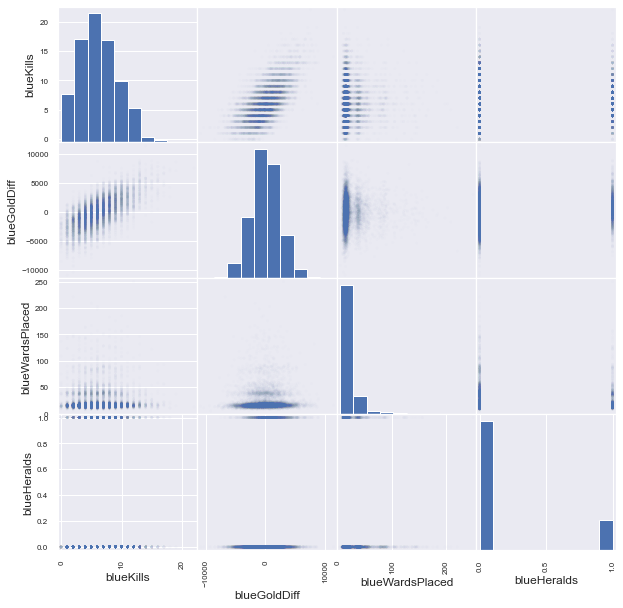

In [13]:
data1 = data.loc[:,['blueKills','blueGoldDiff','blueWardsPlaced','blueHeralds']]
scatter_matrix(data1, alpha = .01, figsize = (10, 10))
pass

## 3. Обработка пропущенных значений

In [15]:
new_data.isna().sum()

blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
redWardsPlaced                  0
redWardsDestroyed               0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds                      0
redTowersDestroyed              0
redTotalGold                    0
redAvgLevel                     0
redTotalExperience              0
redTotalMinionsKilled           0
redTotalJungle

Нет пропущенных значений, вуху


## 4. Обработка категориальных признаков
Их нет, вуху.


## 5. Нормализация


In [16]:
data_norm = (new_data - new_data.mean(axis = 0)) / new_data.std(axis = 0)
data_norm.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
count,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,...,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03
mean,3.166928e-17,-1.103312e-16,3.361125e-16,-2.787077e-18,1.252478e-16,-6.410291e-16,-1.244520e-16,6.228667e-16,1.400057e-16,4.027888e-16,...,1.309027e-16,-3.110512e-16,-6.720451e-18,7.625352e-16,-6.610317e-17,1.130047e-15,-1.642333e-13,3.768004e-16,6.176409e-16,5.251617e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.980281e-01,-9.594383e-01,-1.298797e+00,-1.009612e+00,-2.053759e+00,-2.092041e+00,-1.634905e+00,-8.791865e-01,-7.531875e-01,-4.811081e-01,...,-1.640667e+00,-9.148471e-01,-8.389232e-01,-4.364729e-01,-1.983428e-01,-3.539528e+00,-6.961143e+00,-6.254656e+00,-5.036094e+00,-4.718152e+00
25%,-9.980281e-01,-4.599704e-01,-8.390264e-01,-1.009612e+00,-7.253089e-01,-7.286294e-01,-6.507794e-01,-8.791865e-01,-7.531875e-01,-4.811081e-01,...,-6.555936e-01,-9.148471e-01,-8.389232e-01,-4.364729e-01,-1.983428e-01,-7.120194e-01,-4.104541e-01,-6.275993e-01,-6.548669e-01,-7.292753e-01
50%,-9.980281e-01,-3.489776e-01,8.051451e-02,9.903793e-01,-6.108396e-02,-4.692376e-02,-1.587164e-01,-8.791865e-01,-7.531875e-01,-4.811081e-01,...,-1.630571e-01,-9.148471e-01,-8.389232e-01,-4.364729e-01,-1.983428e-01,-7.448002e-02,2.446147e-01,1.023671e-02,2.969990e-02,-3.122178e-02
75%,1.001874e+00,-1.269918e-01,5.402850e-01,9.903793e-01,6.031410e-01,6.347819e-01,5.793782e-01,7.194668e-01,1.327556e+00,-4.811081e-01,...,5.757477e-01,6.813688e-01,1.191884e+00,-4.364729e-01,-1.983428e-01,6.234260e-01,8.996836e-01,6.697650e-01,7.142667e-01,5.671098e-01
max,1.001874e+00,1.263719e+01,1.111501e+01,9.903793e-01,5.252716e+00,5.406721e+00,5.500009e+00,2.318120e+00,1.327556e+00,2.078325e+00,...,5.254845e+00,2.277585e+00,1.191884e+00,2.290861e+00,9.022499e+00,4.187408e+00,4.175028e+00,3.593632e+00,3.269983e+00,4.057377e+00


## 6. Разбитие выборки


In [18]:
x = data_norm.drop(['blueWins'], axis=1)
y = data['blueWins']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.25, random_state=42)

In [20]:
N_train, _ = x_train.shape 
N_test,  _ = x_test.shape 

N_train, N_test

(7409, 2470)

## 7.-8. Метод ближайщих соседей и ошибки


In [37]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1000)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
train_er = sklearn.metrics.mean_squared_error(y_train, y_train_pred)
test_er = sklearn.metrics.mean_squared_error(y_test, y_test_pred)
print(f"Train metrics: {train_er}, Test metrics: {test_er}")

Train metrics: 0.2695370495343501, Test metrics: 0.26842105263157895


In [38]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=100)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
train_er = sklearn.metrics.mean_squared_error(y_train, y_train_pred)
test_er = sklearn.metrics.mean_squared_error(y_test, y_test_pred)
print(f"Train metrics: {train_er}, Test metrics: {test_er}")

Train metrics: 0.27304629504656497, Test metrics: 0.2757085020242915


## 9. Другие классификаторы


In [49]:
gbt = sklearn.ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(x_train, y_train)

train_er = np.mean(y_train != gbt.predict(x_train))
test_er = np.mean(y_test != gbt.predict(x_test))

print(train_er, test_er)

0.09407477392360643 0.294331983805668


In [50]:
gbt = sklearn.ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(x_train, y_train)

train_er = np.mean(y_train != gbt.predict(x_train))
test_er = np.mean(y_test != gbt.predict(x_test))

print(train_er, test_er)

0.244972330948846 0.27813765182186234


In [ ]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(x_train, y_train)

train_er = np.mean(y_train != rf.predict(x_train))
test_er  = np.mean(y_test  != rf.predict(x_test))

print(train_er, test_er)